In [ ]:
%pip install requests pandas 

In [12]:
import os
from dotenv import load_dotenv

load_dotenv() 

True

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
} 
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': os.getenv('CMC_API_KEY'),
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
type(data)

dict

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [9]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from datetime import datetime
from time import sleep

SAVING SNAPSHOT CSV FOR EACH MINUTE

In [10]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '100',
        'convert': 'USD'
    }
    headers = {
       'Accepts': 'application/json',
       'X-CMC_PRO_API_KEY': os.getenv('CMC_API_KEY'),}
    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return

    # Normalize and add timestamp
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    # Save snapshot with timestamp in filename
    now = datetime.now().strftime('%Y-%m-%d_%H-%M')
    filename = f'snapshots/snapshot_{now}.csv'
    
    os.makedirs('snapshots', exist_ok=True)  # Create folder if not exists
    df.to_csv(filename, index=False)
    print(f"Saved snapshot: {filename}")

In [ ]:
for i in range(100):
    api_runner()
    print("API Runner completed")
    sleep(60) #sleep for 1 minute
exit()

In [133]:
import pandas as pd
import glob

def load_all_snapshots():
    # Adjust the path as needed
    files = sorted(glob.glob("snapshots/snapshot_*.csv"))
    df_list = [pd.read_csv(file) for file in files]
    df_all = pd.concat(df_list, ignore_index=True)
    df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
    return df_all


In [134]:
df = load_all_snapshots()
print(df.shape)
df.head()


(3000, 37)


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11996,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19841384.00000,19841384.00000,False,NaN,1,NaN,NaN,NaN,2025-03-24T17:39:00.000Z,88436.36925,29771614283.59581,159.79130,0.40838,3.94411,5.06639,-8.46812,-16.18134,-10.18540,1754699961817.85352,60.78730,1857163754210.63989,NaN,2025-03-24T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-24 23:11:18.643421
1,1027,Ethereum,ETH,ethereum,10074,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120639295.20109,120639295.20109,True,NaN,2,NaN,NaN,NaN,2025-03-24T17:39:00.000Z,2088.91805,13911853030.92618,93.78740,0.68656,4.69658,8.28616,-25.13774,-35.74471,-40.15362,252005601545.91107,8.73160,252005601545.91000,NaN,2025-03-24T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-24 23:11:18.643421
2,52,XRP,XRP,xrp,1559,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58158111605.00000,99986323420.00000,False,NaN,3,NaN,NaN,NaN,2025-03-24T17:39:00.000Z,2.47286,3254536218.76923,66.33560,0.80887,2.88947,5.09006,-4.74189,-20.90402,6.32905,143816846295.56650,4.98300,247285962914.92999,NaN,2025-03-24T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-24 23:11:18.643421
3,825,Tether USDt,USDT,tether,120993,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'wav...",NaN,143487285482.36600,145880315793.73941,True,NaN,4,NaN,NaN,NaN,2025-03-24T17:39:00.000Z,1.00002,63809175071.71579,68.04150,-0.00550,0.01651,0.01176,0.01438,-0.01684,0.06284,143490289747.36432,4.97090,145883370162.81000,NaN,2025-03-24T17:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-24 23:11:18.643421
4,1839,BNB,BNB,bnb,2408,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142472846.43000,142472846.43000,False,NaN,5,NaN,NaN,NaN,2025-03-24T17:39:00.000Z,638.73686,1757954886.48470,46.11300,0.64939,2.65417,1.60435,-4.12681,-7.05082,-8.11927,91002658274.40988,3.15310,91002658274.41000,NaN,2025-03-24T17:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-24 23:11:18.643421


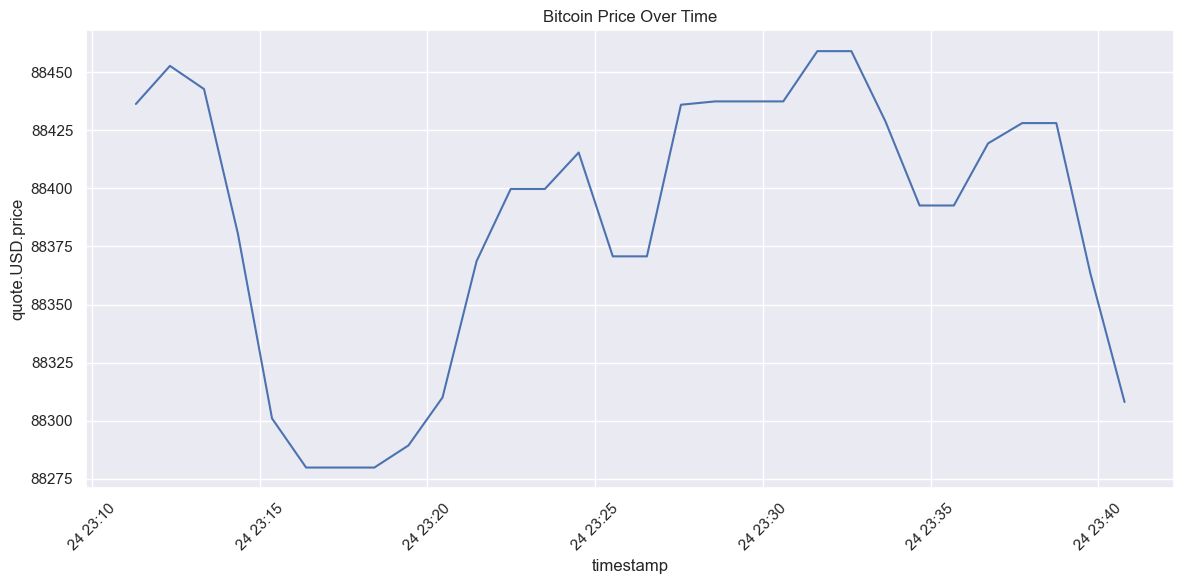

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

df = load_all_snapshots()
btc = df[df['name'] == 'Bitcoin']

plt.figure(figsize=(12, 6))
sns.lineplot(data=btc, x='timestamp', y='quote.USD.price')
plt.title('Bitcoin Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EXPLORATORY ANALYSIS

In [ ]:
import os
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'100',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': os.getenv('CMC_API_KEY'),
    }
    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    df= pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    if not os.path.isfile(r'C:\Users\Diya Giri\GitHub\Portfolio_Projects\Automating_Crypto_Website_API_Pull\api.csv'):
        df.to_csv(r'C:\Users\Diya Giri\GitHub\Portfolio_Projects\Automating_Crypto_Website_API_Pull\api.csv', header='column_names', index=False)
    else:
        df.to_csv(r'C:\Users\Diya Giri\GitHub\Portfolio_Projects\Automating_Crypto_Website_API_Pull\api.csv', mode='a', header=False, index=False)

In [ ]:
df1=pd.read_csv(r'C:\Users\Diya Giri\GitHub\Portfolio_Projects\Automating_Crypto_Website_API_Pull\api.csv')
df1

In [137]:
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x))

In [ ]:
df1

In [139]:
# Convert timestamps
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['date_added'] = pd.to_datetime(df1['date_added'])

Top N Cryptocurrencies

In [144]:
# Step 1: Get the latest timestamp
latest_time = df1['timestamp'].max()

# Step 2: Filter the data for only that snapshot
df_latest = df1[df1['timestamp'] == latest_time]

# Step 3: Now safely get the top 10 by price or market cap
top10_price = df_latest.nlargest(10, 'quote.USD.price')
top10_marketcap = df_latest.nlargest(10, 'quote.USD.market_cap')


C:\Users\Diya Giri\AppData\Local\Temp\ipykernel_28076\639194943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_price, y='name', x='quote.USD.price', palette='viridis')


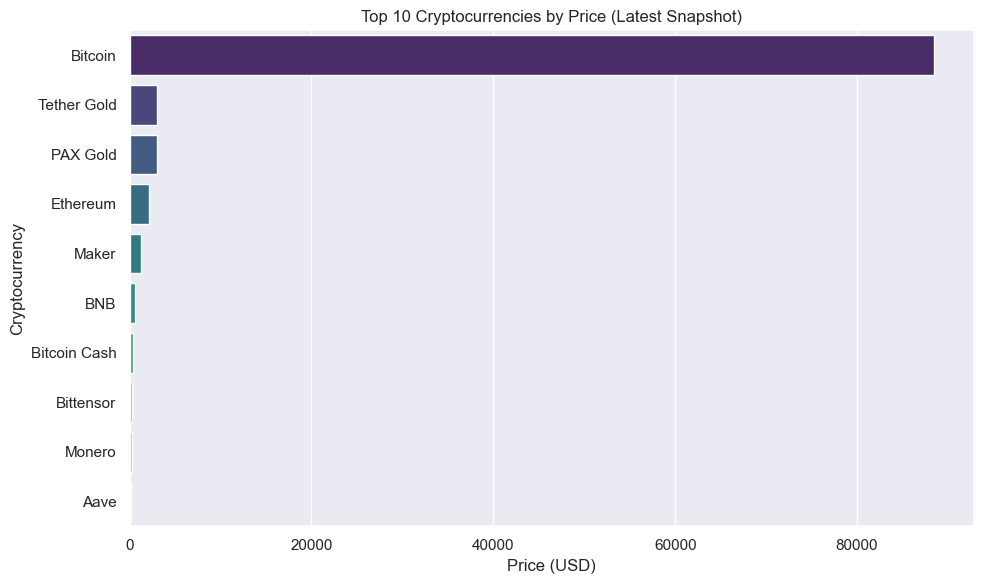

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 by price
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_price, y='name', x='quote.USD.price', palette='viridis')
plt.title('Top 10 Cryptocurrencies by Price (Latest Snapshot)')
plt.xlabel('Price (USD)')
plt.ylabel('Cryptocurrency')
plt.tight_layout()
plt.show()


Performance Over Time

Text(0.5, 1.0, 'Correlation Heatmap of % Change Columns')

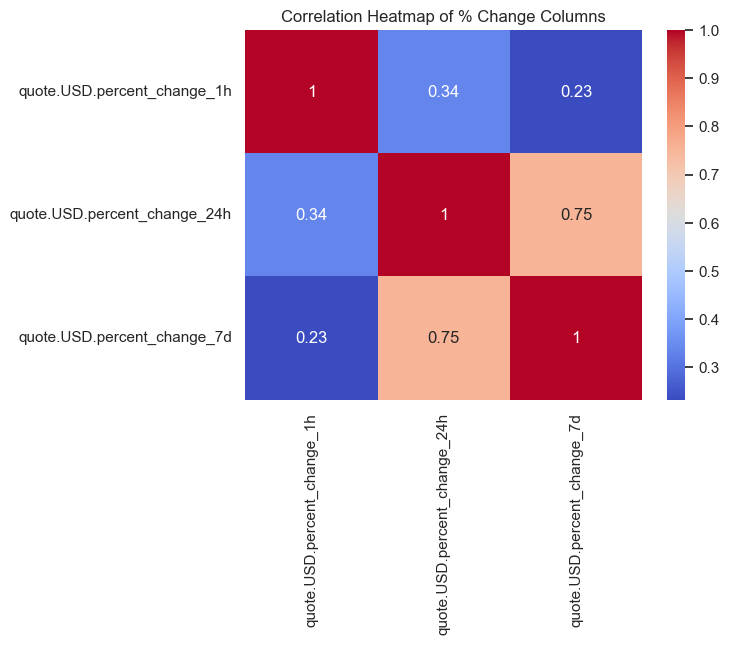

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

pct_cols = ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d']
sns.heatmap(df1[pct_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of % Change Columns')

Market Dominance

Text(0.5, 1.0, 'Top 10 Cryptocurrencies by Market Cap Dominance')

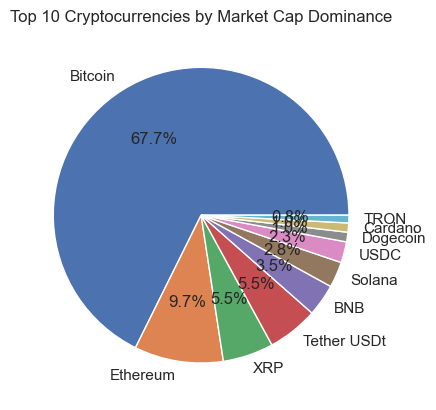

In [148]:
top10_dominance = df_latest.nlargest(10, 'quote.USD.market_cap_dominance')
plt.pie(top10_dominance['quote.USD.market_cap_dominance'], labels=top10_dominance['name'], autopct='%1.1f%%')
plt.title('Top 10 Cryptocurrencies by Market Cap Dominance')

Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Columns')

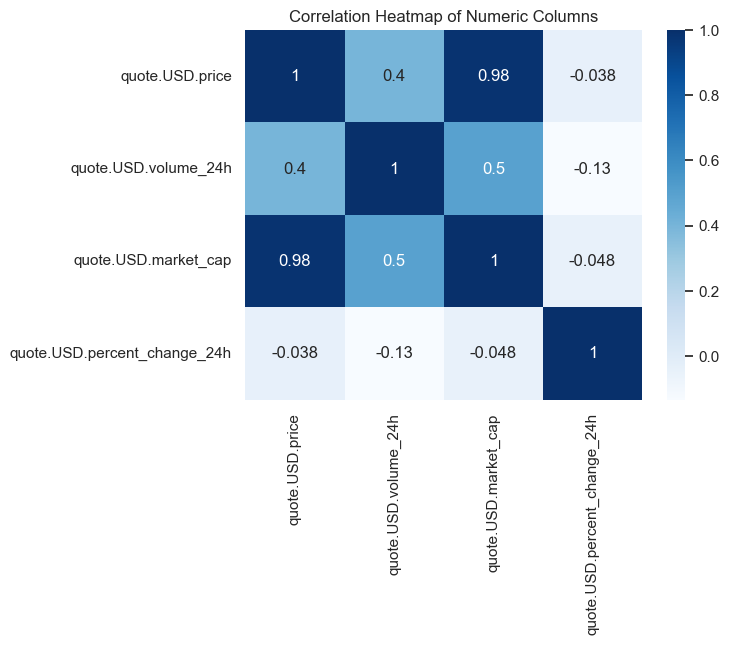

In [152]:
numeric_cols = ['quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.market_cap', 'quote.USD.percent_change_24h']
sns.heatmap(df_latest[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Columns')

Tag/Category Analysis

In [ ]:
from collections import Counter
from ast import literal_eval

df_latest['tags'] = df_latest['tags'].apply(literal_eval)  # Convert string to list
all_tags = sum(df_latest['tags'], [])
Counter(all_tags).most_common(10)


In [ ]:
df2=df1.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [ ]:
df2.stack()
df2

In [ ]:
type(df2)

pandas.core.series.Series

In [ ]:
df2.count()

np.int64(600)

In [ ]:
df2=df2.to_frame(name='values')
df2

In [ ]:
index=pd.Index(range(600))
df2=df2.reset_index()
df2

In [ ]:
df2.rename(columns={'level_1':'percent_change'},inplace=True)
df2

In [ ]:
%pip install seaborn matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2['percent_change'] = df2['percent_change'].replace({
    'quote.USD.percent_change_1h': '1 Hour',
    'quote.USD.percent_change_24h': '1 Day',
    'quote.USD.percent_change_7d': '1 Week',
    'quote.USD.percent_change_30d': '1 Month',
    'quote.USD.percent_change_60d': '2 Months',
    'quote.USD.percent_change_90d': '3 Months'
})
df2

In [ ]:

top10_names = df2['name'].value_counts().index[:10]
filtered_df = df2[df2['name'].isin(top10_names)]

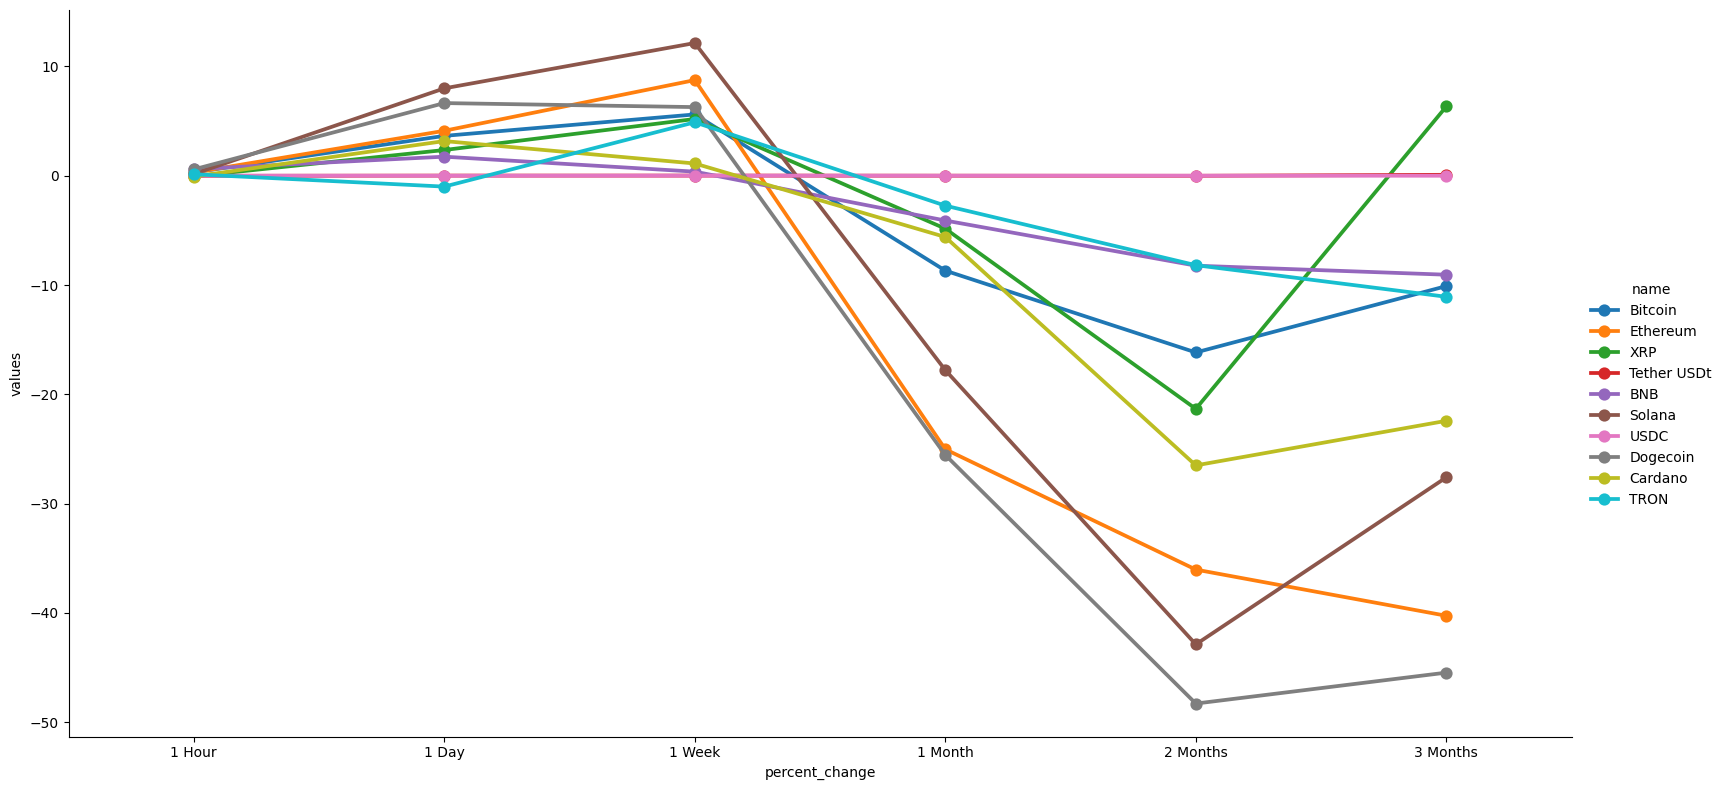

In [112]:
sns.catplot(
    x='percent_change',
    y='values',
    hue='name',
    data=filtered_df,
    kind='point',
    height=8,
    aspect=2
)

In [ ]:
df3=df1[['name','quote.USD.price','timestamp']]
df3=df3.query("name =='Bitcoin'")
df3

,name,quote.USD.price,timestamp
0,Bitcoin,88293.17840,2025-03-24 21:29:43.843875
100,Bitcoin,88293.17840,2025-03-24 21:30:44.757455
200,Bitcoin,88324.60266,2025-03-24 21:31:45.691858
300,Bitcoin,88362.31483,2025-03-24 21:32:46.595356
400,Bitcoin,88403.77936,2025-03-24 21:33:47.540722
500,Bitcoin,88382.38736,2025-03-24 21:34:48.477565
600,Bitcoin,88382.38736,2025-03-24 21:35:49.757183
700,Bitcoin,88384.15154,2025-03-24 21:36:50.692887
800,Bitcoin,88124.24199,2025-03-24 21:53:52.821537
900,Bitcoin,88143.55690,2025-03-24 21:54:53.733005


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2025-03-24 21:29:43.843875'),
  Text(1, 0, '2025-03-24 21:30:44.757455'),
  Text(2, 0, '2025-03-24 21:31:45.691858'),
  Text(3, 0, '2025-03-24 21:32:46.595356'),
  Text(4, 0, '2025-03-24 21:33:47.540722'),
  Text(5, 0, '2025-03-24 21:34:48.477565'),
  Text(6, 0, '2025-03-24 21:35:49.757183'),
  Text(7, 0, '2025-03-24 21:36:50.692887'),
  Text(8, 0, '2025-03-24 21:53:52.821537'),
  Text(9, 0, '2025-03-24 21:54:53.733005'),
  Text(10, 0, '2025-03-24 22:35:49.397251')])

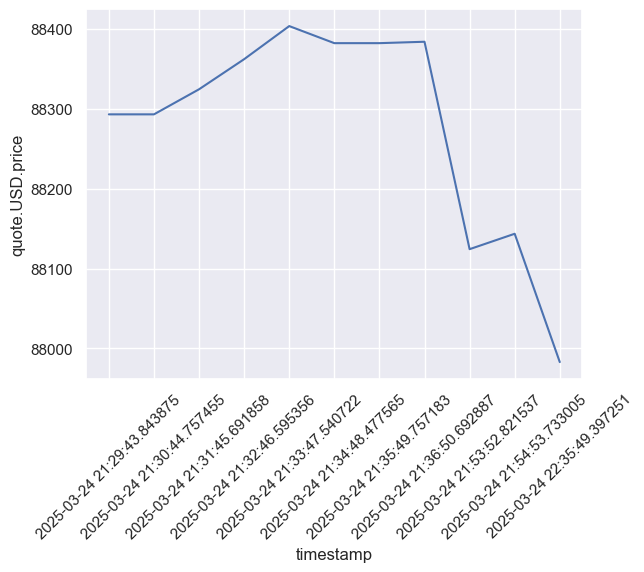

In [ ]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df3)
plt.xticks(rotation=45)